In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib
import matplotlib.pyplot as plt
import riemann
from os.path import exists 
import wget
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['lines.markeredgewidth'] = 0.5
matplotlib.rcParams['lines.markersize'] = 8

This jupyter notebook contains functions, programs and plots for **APC 523 Lecture 23 on Advanced Hyperbolic Solvers** (copyright Romain Teyssier, Princeton University). 

You need to first to install the RAMSES code using ``git clone https://rteyssie@bitbucket.org/rteyssie/ramses.git`` and compile RAMSES with ``make NDIM=1`` in directory ``~/ramses/bin`` and copy the executable in the directory of this Notebook using: ``cp ~/ramses/bin/ramses1d .``.

In [2]:
if not(exists("test_sod.nml")):
    wget.download("https://tigress-web.princeton.edu/~rt3504/APC523/test_sod.nml","test_sod.nml")
cmd='./ramses1d test_sod.nml > run_sod.log'
!{cmd}

In [3]:
with open("run_sod.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data = ascii.read("run_sod.log",header_start=i-2,data_start=i-1,data_end=i-1+n)
print(data)

line: 34 cells:   58 
line: 1288 cells:  142 
lev    x       d       u      P 
--- -------- ----- --------- ---
  5 0.015625   1.0       0.0 1.0
  5 0.046875   1.0       0.0 1.0
  5 0.078125   1.0       0.0 1.0
  5 0.109375   1.0 1.564e-09 1.0
  6 0.132812   1.0 2.112e-08 1.0
  6 0.148438   1.0 2.817e-07 1.0
  6 0.164062   1.0 3.695e-06 1.0
...      ...   ...       ... ...
  8 0.951172 0.125       0.0 0.1
  8 0.955078 0.125       0.0 0.1
  8 0.958984 0.125       0.0 0.1
  7 0.964844 0.125       0.0 0.1
  7 0.972656 0.125       0.0 0.1
  7 0.980469 0.125       0.0 0.1
  7 0.988281 0.125       0.0 0.1
  7 0.996094 0.125       0.0 0.1
Length = 142 rows


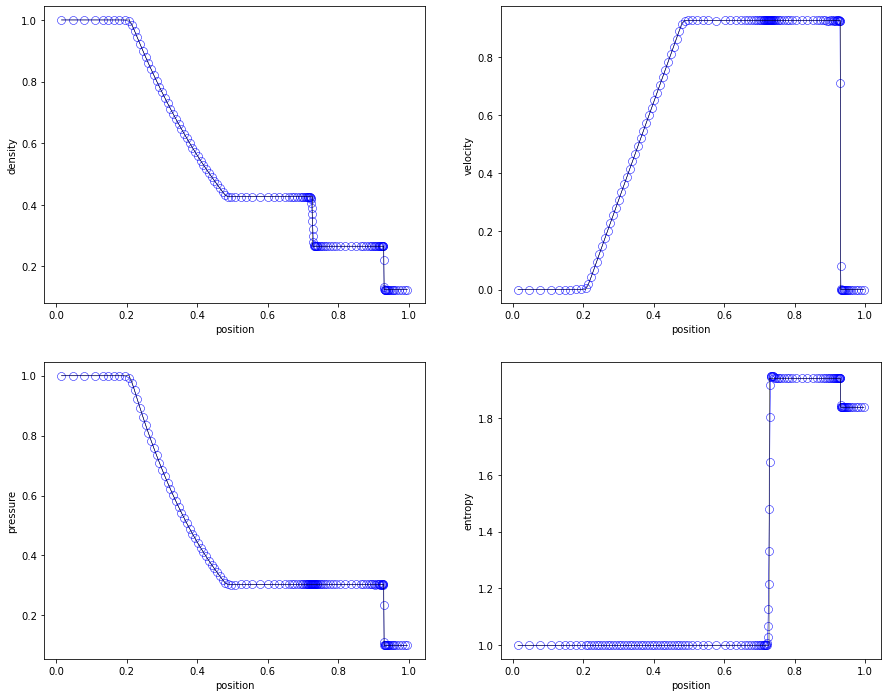

In [4]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# compute exact solution
xana = data["x"]
wana = np.zeros([3,n])
for i in range(0,n):
    s = (xana[i]-0.5)/0.245
    d,v,p = riemann.exact_solution(s,[1,0,1],[0.125,0,0.1])
    wana[:,i]=[d,v,p]

ax1.set_xlabel("position")
ax1.set_ylabel("density")
ax1.plot(data["x"],data["d"],'bo-',mfc='none')
ax1.plot(xana,wana[0],"k-")

ax2.set_xlabel("position")
ax2.set_ylabel("velocity")
ax2.plot(data["x"],data["u"],'bo-',mfc='none')
ax2.plot(xana,wana[1],"k-")

ax3.set_xlabel("position")
ax3.set_ylabel("pressure")
ax3.plot(data["x"],data["P"],'bo-',mfc='none')
ax3.plot(xana,wana[2],"k-")

s = data["P"]/data["d"]**1.4
ax4.set_xlabel("position")
ax4.set_ylabel("entropy")
ax4.plot(data["x"],s,'bo-',mfc='none')
ax4.plot(xana,wana[2]/wana[0]**1.4,"k-")

plt.savefig('sod_test_amr.png')

In [5]:
if not(exists("test_toro1.nml")):
    wget.download("https://tigress-web.princeton.edu/~rt3504/APC523/test_toro1.nml","test_toro1.nml")
cmd='./ramses1d test_toro1.nml > run_toro1.log'
!{cmd}

In [6]:
with open("run_toro1.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data = ascii.read("run_toro1.log",header_start=i-2,data_start=i-1,data_end=i-1+n)
print(data)

line: 34 cells:   61 
line: 1319 cells:  131 
lev    x       d    u    P 
--- -------- ----- ---- ---
  5 0.015625   1.0 0.75 1.0
  5 0.046875   1.0 0.75 1.0
  5 0.078125   1.0 0.75 1.0
  5 0.109375   1.0 0.75 1.0
  6 0.132812   1.0 0.75 1.0
  6 0.148438   1.0 0.75 1.0
  6 0.164062   1.0 0.75 1.0
...      ...   ...  ... ...
  6 0.820312 0.125  0.0 0.1
  6 0.835938 0.125  0.0 0.1
  6 0.851562 0.125  0.0 0.1
  6 0.867188 0.125  0.0 0.1
  5 0.890625 0.125  0.0 0.1
  5 0.921875 0.125  0.0 0.1
  5 0.953125 0.125  0.0 0.1
  5 0.984375 0.125  0.0 0.1
Length = 131 rows


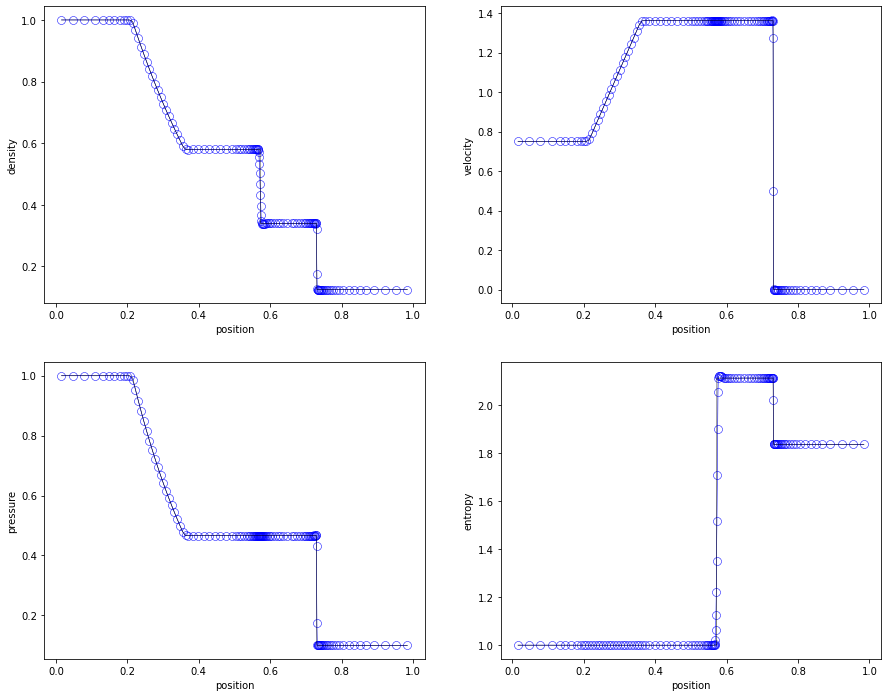

In [7]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# compute exact solution
xana = data["x"]
wana = np.zeros([3,n])
for i in range(0,n):
    s = (xana[i]-0.3)/0.2
    d,v,p = riemann.exact_solution(s,[1,0.75,1],[0.125,0,0.1])
    wana[:,i]=[d,v,p]

ax1.set_xlabel("position")
ax1.set_ylabel("density")
ax1.plot(data["x"],data["d"],'bo-',mfc='none')
ax1.plot(xana,wana[0],"k-")

ax2.set_xlabel("position")
ax2.set_ylabel("velocity")
ax2.plot(data["x"],data["u"],'bo-',mfc='none')
ax2.plot(xana,wana[1],"k-")

ax3.set_xlabel("position")
ax3.set_ylabel("pressure")
ax3.plot(data["x"],data["P"],'bo-',mfc='none')
ax3.plot(xana,wana[2],"k-")

s = data["P"]/data["d"]**1.4
ax4.set_xlabel("position")
ax4.set_ylabel("entropy")
ax4.plot(data["x"],s,'bo-',mfc='none')
ax4.plot(xana,wana[2]/wana[0]**1.4,"k-")

plt.savefig('toro_test1_amr.png')

In [8]:
if not(exists("test_toro2.nml")):
    wget.download("https://tigress-web.princeton.edu/~rt3504/APC523/test_toro2.nml","test_toro2.nml")
cmd='./ramses1d test_toro2.nml > run_toro2.log'
!{cmd}

In [9]:
with open("run_toro2.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data = ascii.read("run_toro2.log",header_start=i-2,data_start=i-1,data_end=i-1+n)
print(data)

line: 34 cells:   58 
line: 1006 cells:  426 
lev     x       d      u     P   
--- --------- ------ ----- ------
  6 0.0078125    1.0  -2.0    0.4
  6 0.0234375    1.0  -2.0    0.4
  6 0.0390625    1.0  -2.0    0.4
  7 0.0507812    1.0  -2.0    0.4
  7 0.0585938    1.0  -2.0    0.4
  7 0.0664062    1.0  -2.0    0.4
  7 0.0742188 0.9998  -2.0 0.3999
...       ...    ...   ...    ...
  8  0.919922 0.9988 1.999 0.3993
  7  0.925781 0.9998   2.0 0.3999
  7  0.933594    1.0   2.0    0.4
  7  0.941406    1.0   2.0    0.4
  7  0.949219    1.0   2.0    0.4
  6  0.960938    1.0   2.0    0.4
  6  0.976562    1.0   2.0    0.4
  6  0.992188    1.0   2.0    0.4
Length = 426 rows


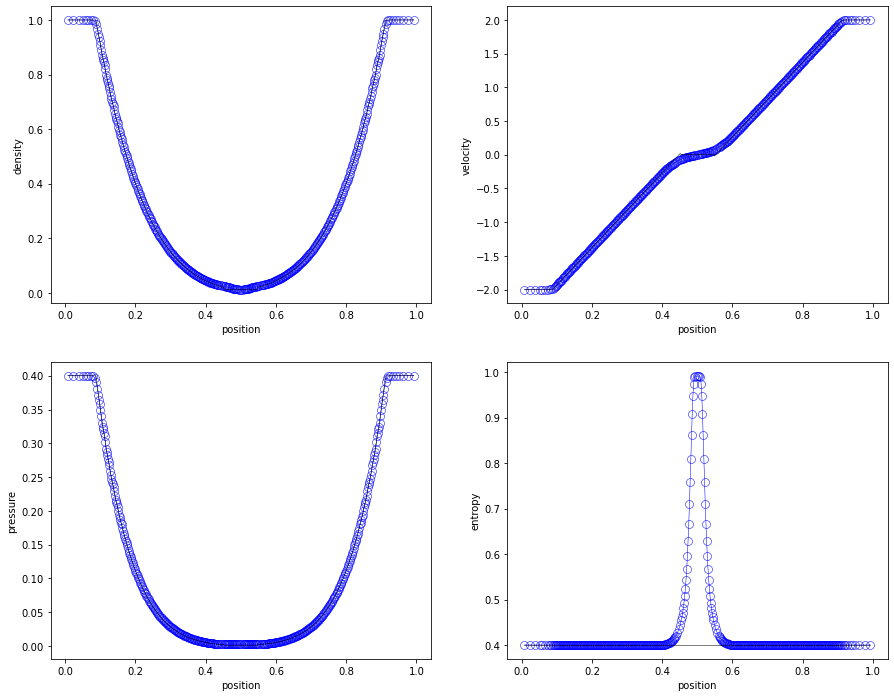

In [10]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# compute exact solution
xana = data["x"]
wana = np.zeros([3,n])
for i in range(0,n):
    s = (xana[i]-0.5)/0.15
    d,v,p = riemann.exact_solution(s,[1,-2,0.4],[1,2,0.4])
    wana[:,i]=[d,v,p]

ax1.set_xlabel("position")
ax1.set_ylabel("density")
ax1.plot(data["x"],data["d"],'bo-',mfc='none')
ax1.plot(xana,wana[0],"k-")

ax2.set_xlabel("position")
ax2.set_ylabel("velocity")
ax2.plot(data["x"],data["u"],'bo-',mfc='none')
ax2.plot(xana,wana[1],"k-")

ax3.set_xlabel("position")
ax3.set_ylabel("pressure")
ax3.plot(data["x"],data["P"],'bo-',mfc='none')
ax3.plot(xana,wana[2],"k-")

s = data["P"]/data["d"]**1.4
ax4.set_xlabel("position")
ax4.set_ylabel("entropy")
ax4.plot(data["x"],s,'bo-',mfc='none')
ax4.plot(xana,wana[2]/wana[0]**1.4,"k-")

plt.savefig('toro_test2_amr.png')

In [11]:
if not(exists("test_toro3.nml")):
    wget.download("https://tigress-web.princeton.edu/~rt3504/APC523/test_toro3.nml","test_toro3.nml")
cmd='./ramses1d test_toro3.nml > run_toro3.log'
!{cmd}

In [12]:
with open("run_toro3.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data = ascii.read("run_toro3.log",header_start=i-2,data_start=i-1,data_end=i-1+n)
print(data)

line: 34 cells:   58 
line: 1540 cells:  121 
lev     x       d       u       P  
--- --------- ------ -------- -----
  6 0.0078125 0.9998 0.001382 999.7
  6 0.0234375 0.9993  0.02393 999.0
  6 0.0390625 0.9952    0.186 993.2
  6 0.0546875 0.9801   0.7538 972.2
  6 0.0703125 0.9556    1.694 938.4
  6 0.0859375 0.9275      2.8 900.0
  7 0.0976562 0.9064    3.647 871.5
...       ...    ...      ...   ...
  7  0.855469    1.0      0.0  0.01
  6  0.867188    1.0      0.0  0.01
  6  0.882812    1.0      0.0  0.01
  6  0.898438    1.0      0.0  0.01
  6  0.914062    1.0      0.0  0.01
  6  0.929688    1.0      0.0  0.01
  5  0.953125    1.0      0.0  0.01
  5  0.984375    1.0      0.0  0.01
Length = 121 rows


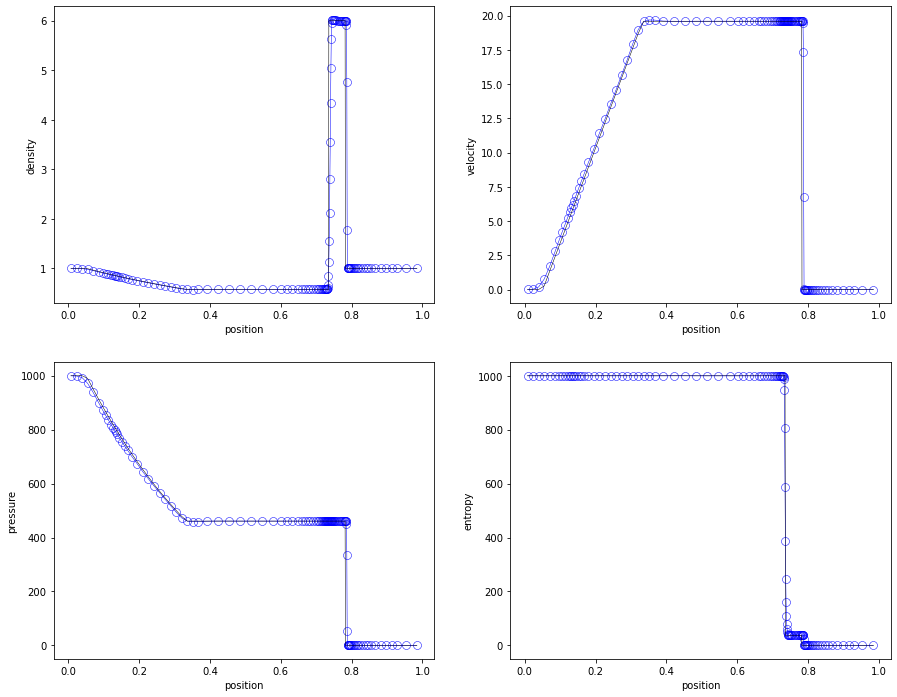

In [13]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# compute exact solution
xana = data["x"]
wana = np.zeros([3,n])
for i in range(0,n):
    s = (xana[i]-0.5)/0.012
    d,v,p = riemann.exact_solution(s,[1,0,1000],[1,0,0.01])
    wana[:,i]=[d,v,p]

ax1.set_xlabel("position")
ax1.set_ylabel("density")
ax1.plot(data["x"],data["d"],'bo-',mfc='none')
ax1.plot(xana,wana[0],"k-")

ax2.set_xlabel("position")
ax2.set_ylabel("velocity")
ax2.plot(data["x"],data["u"],'bo-',mfc='none')
ax2.plot(xana,wana[1],"k-")

ax3.set_xlabel("position")
ax3.set_ylabel("pressure")
ax3.plot(data["x"],data["P"],'bo-',mfc='none')
ax3.plot(xana,wana[2],"k-")

s = data["P"]/data["d"]**1.4
ax4.set_xlabel("position")
ax4.set_ylabel("entropy")
ax4.plot(data["x"],s,'bo-',mfc='none')
ax4.plot(xana,wana[2]/wana[0]**1.4,"k-")

plt.savefig('toro_test3_amr.png')

In [14]:
if not(exists("tube1d.nml")):
    wget.download("https://tigress-web.princeton.edu/~rt3504/APC523/tube1d.nml","tube1d.nml")
cmd='sed -i -e "s/hllc/llf/g" tube1d.nml'
!{cmd}
cmd='./ramses1d tube1d.nml > run_tube_llf.log'
!{cmd}
cmd='sed -i -e "s/llf/hll/g" tube1d.nml'
!{cmd}
cmd='./ramses1d tube1d.nml > run_tube_hll.log'
!{cmd}
cmd='sed -i -e "s/hll/hllc/g" tube1d.nml'
!{cmd}
cmd='./ramses1d tube1d.nml > run_tube_hllc.log'
!{cmd}

In [15]:
with open("run_tube_llf.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data1 = ascii.read("run_tube_llf.log",header_start=i-2,data_start=i-1,data_end=i-1+n)

with open("run_tube_hll.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data2 = ascii.read("run_tube_hll.log",header_start=i-2,data_start=i-1,data_end=i-1+n)

with open("run_tube_hllc.log") as myFile:
    for num, line in enumerate(myFile, 1):
        if "Output" in line:
            print('line:', num, 'cells: ',line[10:14])
            i=num; n=int(line[10:14])

data3 = ascii.read("run_tube_hllc.log",header_start=i-2,data_start=i-1,data_end=i-1+n)

line: 34 cells:   58 
line: 1288 cells:  143 
line: 34 cells:   58 
line: 1288 cells:  141 
line: 34 cells:   58 
line: 1288 cells:  142 


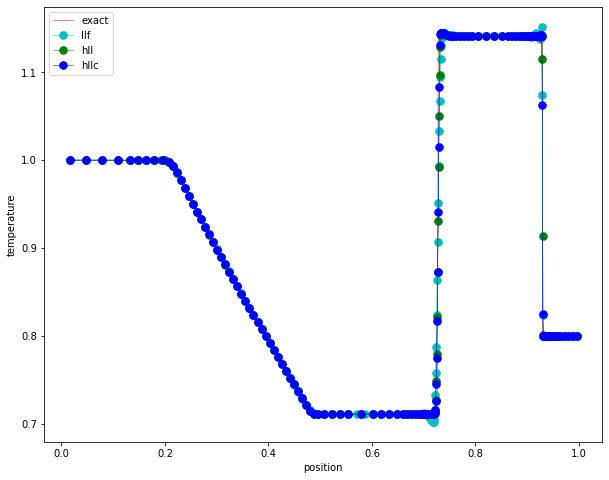

In [16]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

# compute exact solution
xana = data3["x"]
wana = np.zeros([3,n])
for i in range(0,n):
    s = (xana[i]-0.5)/0.245
    d,v,p = riemann.exact_solution(s,[1,0,1],[0.125,0,0.1])
    wana[:,i]=[d,v,p]

ax1.set_xlabel("position")
ax1.set_ylabel("temperature")
ax1.plot(xana,wana[2]/wana[0],"r-",label="exact")
t = data1["P"]/data1["d"]
ax1.plot(data1["x"],t,"co-",label="llf")
t = data2["P"]/data2["d"]
ax1.plot(data2["x"],t,"go-",label="hll")
t = data3["P"]/data3["d"]
ax1.plot(data3["x"],t,"bo-",label="hllc")

ax1.legend(loc="upper left")

plt.savefig('riemann_comp_amr.png')